## Interpretable Student Placement Prediction

In [180]:
# 1. DATA PREPROCESSING
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

## Loading data

In [181]:
df = pd.read_csv("/Users/russelmarange/Downloads/Zimttech (chipuriro)/Placement_Prediction_data.csv")

df = pd.read_csv("/Users/russelmarange/Downloads/Zimttech (chipuriro)/Placement_Prediction_data.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [182]:
X = df.columns
X

Index(['StudentId', 'CGPA', 'Major Projects', 'Workshops/Certificatios',
       'Mini Projects', 'Skills', 'Communication Skill Rating', 'Internship',
       'Hackathon', '12th Percentage', '10th Percentage', 'backlogs',
       'PlacementStatus'],
      dtype='object')

## Data Inspection


In [183]:
# Initial inspection
print("Initial Shape:", df.shape)
print(df.head())

Initial Shape: (10000, 13)
   StudentId  CGPA  Major Projects  Workshops/Certificatios  Mini Projects  \
0          1   7.5               1                        1              1   
1          2   8.9               0                        3              2   
2          3   7.3               1                        2              2   
3          4   7.5               1                        1              2   
4          5   8.3               1                        2              2   

   Skills  Communication Skill Rating Internship Hackathon  12th Percentage  \
0       6                         4.4         No        No               61   
1       9                         4.0        Yes       Yes               78   
2       8                         4.8        Yes        No               79   
3       8                         4.4        Yes       Yes               81   
4       8                         4.5        Yes       Yes               74   

   10th Percentage  backlogs 

In [184]:
# X = df.drop('PlacementStatus', axis=1)

X = df.drop('PlacementStatus', axis=1)
print(list(X.columns))

['StudentId', 'CGPA', 'Major Projects', 'Workshops/Certificatios', 'Mini Projects', 'Skills', 'Communication Skill Rating', 'Internship', 'Hackathon', '12th Percentage', '10th Percentage', 'backlogs']


In [185]:
X

StudentId  CGPA  Major Projects  Workshops/Certificatios  Mini Projects  \
0             1   7.5               1                        1              1   
1             2   8.9               0                        3              2   
2             3   7.3               1                        2              2   
3             4   7.5               1                        1              2   
4             5   8.3               1                        2              2   
...         ...   ...             ...                      ...            ...   
9995       9996   7.5               1                        1              2   
9996       9997   7.4               0                        1              0   
9997       9998   8.4               1                        3              0   
9998       9999   8.9               0                        3              2   
9999      10000   8.4               0                        1              1   

      Skills  Communication Skill Rating Internship Hackathon  \
0          6                         4.4         No        No   
1          9                         4.0        Yes       Yes   
2          8                         4.8        Yes        No   
3          8                         4.4        Yes       Yes   
4          8                         4.5        Yes       Yes   
...      ...                         ...        ...       ...   
9995       7                         3.9        Yes        No   
9996       9                         4.8         No        No   
9997       7                         4.8        Yes       Yes   
9998       8                         4.8        Yes       Yes   
9999       6                         3.8         No        No   

      12th Percentage  10th Percentage  backlogs  
0                  61               79         2  
1                  78               82         0  
2                  79               80         2  
3                  81               80         0  
4                  74               88         0  
...               ...              ...       ...  
9995               85               66         4  
9996               84               67         1  
9997               79               81         0  
9998               71               85         0  
9999               62               66         1  

[10000 rows x 12 columns]

## Handling missing values

In [186]:
print("MISSING VALUES COUNT:")
print(df.isnull().sum())

MISSING VALUES COUNT:
StudentId                     0
CGPA                          0
Major Projects                0
Workshops/Certificatios       0
Mini Projects                 0
Skills                        0
Communication Skill Rating    0
Internship                    0
Hackathon                     0
12th Percentage               0
10th Percentage               0
backlogs                      0
PlacementStatus               0
dtype: int64


In [187]:
# Separate numerical and categorical columns from X 
numerical_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

In [188]:

print("Numerical columns :", list(numerical_cols))
print("Categorical columns :", list(categorical_cols))

Numerical columns : ['StudentId', 'CGPA', 'Major Projects', 'Workshops/Certificatios', 'Mini Projects', 'Skills', 'Communication Skill Rating', '12th Percentage', '10th Percentage', 'backlogs']
Categorical columns : ['Internship', 'Hackathon']


### Feature Engineering

In [189]:
from sklearn.preprocessing import LabelEncoder

# Initializing a dictionary to store encoders
label_encoders = {}

# Encoding only actual categorical columns
for col in categorical_cols:
    if col in X.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le
    else:
        print(f"Warning: Column '{col}' not found in the dataset!")

In [190]:
print("Encoded categorical columns:", list(label_encoders.keys()))

Encoded categorical columns: ['Internship', 'Hackathon']


In [191]:
# Show first few encoded values

for col in label_encoders:
    print(f"\nColumn: {col}")
    print(df[[col]].head())  


Column: Internship
   Internship
0           0
1           1
2           1
3           1
4           1

Column: Hackathon
   Hackathon
0          0
1          1
2          0
3          1
4          1


In [192]:
## Saving the encoded categories
import pickle

with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)


In [193]:
# Apply StandardScaler only to numeric data
X_numeric = X.select_dtypes(include=['number'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)


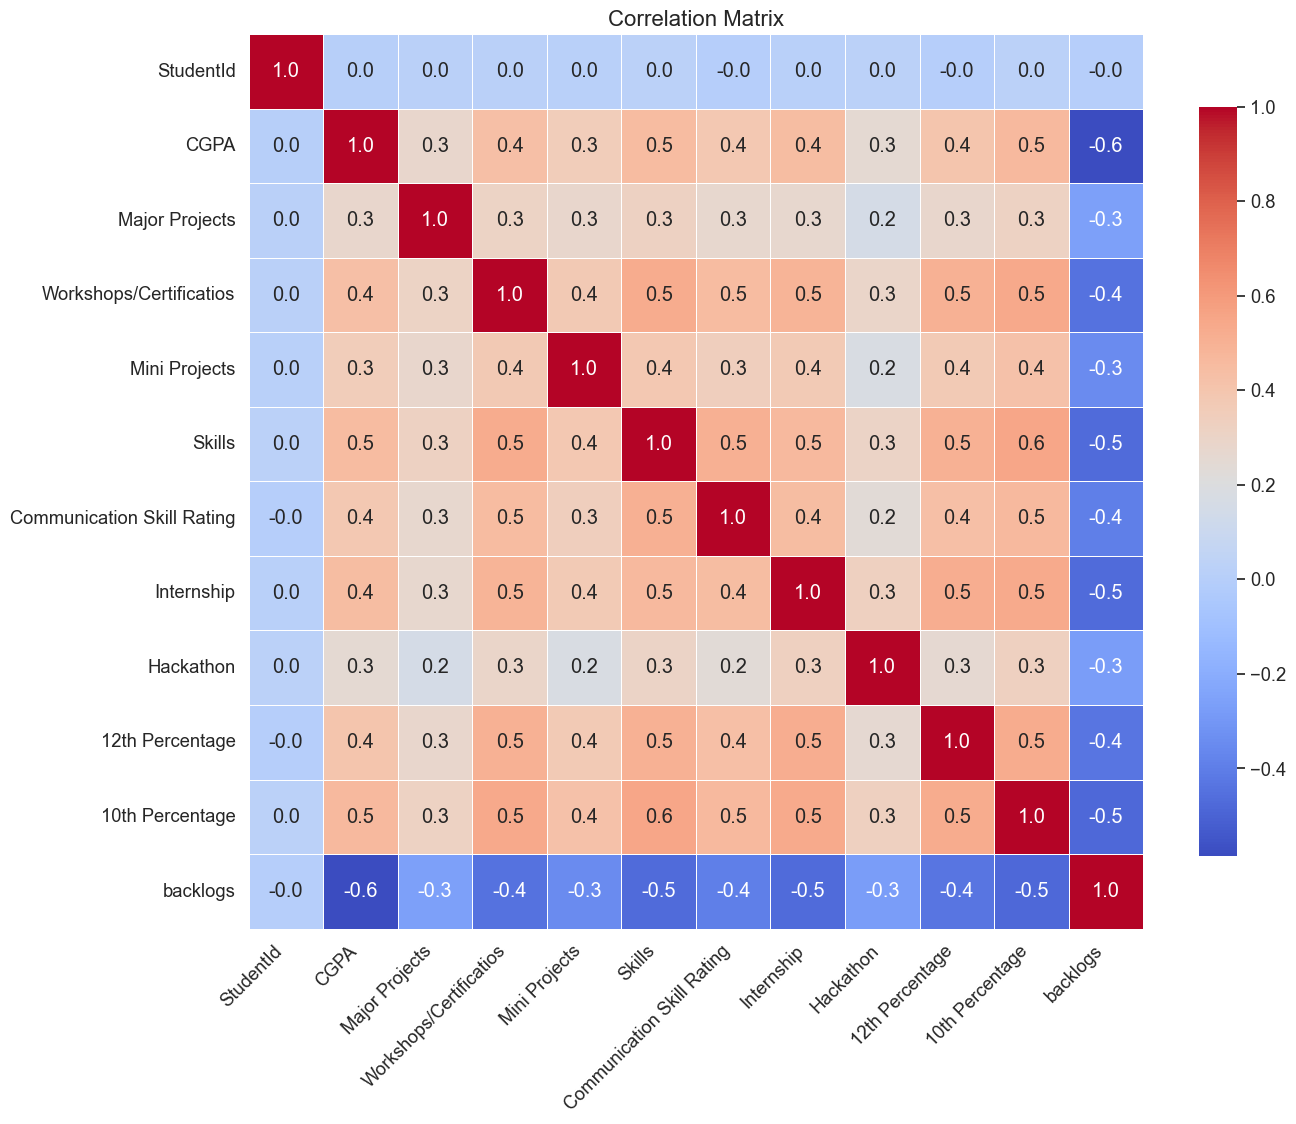

In [194]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(14, 12))  
sns.set(font_scale=1.2)       
heatmap = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".1f",                
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.75}
)


plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()

In [195]:
# Upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

In [196]:
# Threshold for high correlation
threshold = 0.40

# List highly correlated feature pairs
high_corr_pairs = [(col, row, upper.loc[row, col])
                   for col in upper.columns
                   for row in upper.index
                   if abs(upper.loc[row, col]) >= threshold]

# Sort by highest correlation
high_corr_pairs = sorted(high_corr_pairs, key=lambda x: -x[2])

# Print results
for col1, col2, corr_value in high_corr_pairs:
    print(f"{col1} & {col2} => correlation = {corr_value:.2f}")


10th Percentage & Skills => correlation = 0.55
10th Percentage & Workshops/Certificatios => correlation = 0.54
10th Percentage & Internship => correlation = 0.53
Skills & Workshops/Certificatios => correlation = 0.53
10th Percentage & 12th Percentage => correlation = 0.52
12th Percentage & Internship => correlation = 0.52
Communication Skill Rating & Skills => correlation = 0.51
12th Percentage & Skills => correlation = 0.50
12th Percentage & Workshops/Certificatios => correlation = 0.50
Internship & Workshops/Certificatios => correlation = 0.49
10th Percentage & Communication Skill Rating => correlation = 0.47
10th Percentage & CGPA => correlation = 0.46
Internship & Skills => correlation = 0.46
Skills & CGPA => correlation = 0.45
Communication Skill Rating & Workshops/Certificatios => correlation = 0.45
Internship & Communication Skill Rating => correlation = 0.45
Internship & CGPA => correlation = 0.44
Workshops/Certificatios & CGPA => correlation = 0.44
12th Percentage & Communicat

In [197]:
# # List of features to drop
# drop_features = [
#     'hours_studied_per_week',
#     'career_objective_text',
#     'backlogs_count',
#     'project_count',
# ]

# # Drop the columns
# df_cleaned = df.drop(columns=drop_features)

# # Optional: check remaining columns
# print("Remaining columns:", df_cleaned.columns.tolist())


In [228]:
X_train

array([[ 1.47380204,  0.47178622, -0.07388859, ...,  1.32700702,
         1.51344076, -1.24611991],
       [-1.19113135, -0.15311688, -0.07388859, ..., -0.78230576,
         1.17708321,  1.62116014],
       [-1.15337264,  0.78423777, -0.07388859, ...,  0.65586205,
        -1.06530039, -0.5292999 ],
       ...,
       [ 0.13527317, -0.46556843, -0.07388859, ..., -1.35757288,
        -0.95318121,  1.62116014],
       [-1.43396487,  0.47178622, -0.07388859, ..., -1.35757288,
        -0.95318121,  0.18752012],
       [ 0.78652428,  0.78423777, -0.07388859, ...,  1.23112917,
        -0.28046613, -0.5292999 ]])

In [198]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

## Model Building and Training

In [199]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

In [200]:
# Initializing models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier()
}

In [201]:
# Training the models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained successfully.")

Logistic Regression trained successfully.
Decision Tree trained successfully.
SVM trained successfully.
Random Forest trained successfully.
Naive Bayes trained successfully.
Gradient Boosting trained successfully.


## Evaluation Metrics

In [205]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for name, model in models.items():
    y_pred = model.predict(X_test)

In [206]:


print(f"\n{name} Results:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, pos_label='Placed'):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred, pos_label='Placed'):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred, pos_label='Placed'):.4f}")



Gradient Boosting Results:
Accuracy:  0.9325
Precision: 0.9180
Recall:    0.9191
F1 Score:  0.9185


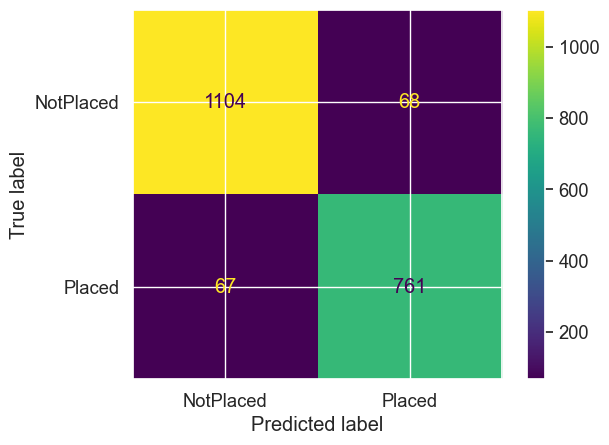

In [207]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)


In [208]:
from sklearn.metrics import roc_auc_score

y_proba = model.predict_proba(X_test)[:, 1]
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")


ROC AUC Score: 0.9869


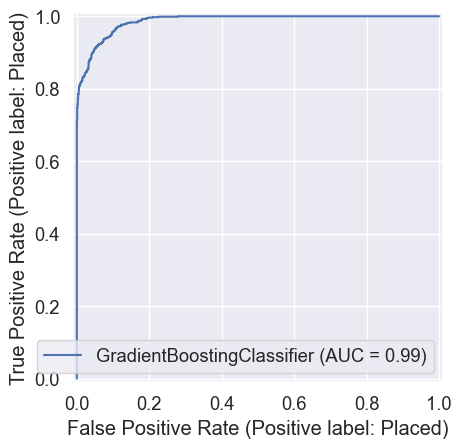

In [209]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(model, X_test, y_test)


## Checking feature importance

In [214]:
print(type(X_train))

<class 'numpy.ndarray'>


In [215]:
# After your feature engineering steps
print("Final feature columns:")
print(list(X.columns))


Final feature columns:
['StudentId', 'CGPA', 'Major Projects', 'Workshops/Certificatios', 'Mini Projects', 'Skills', 'Communication Skill Rating', 'Internship', 'Hackathon', '12th Percentage', '10th Percentage', 'backlogs']


In [232]:
# If you scaled with StandardScaler, get the feature names from your original DataFrame
features_to_scale = df.drop(columns=['PlacementStatus'])
feature_names = X.columns

# Convert X_train and X_test back to DataFrames with correct column names
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df = pd.DataFrame(X_test, columns=feature_names)

# Use these for SHAP
explainer = shap.Explainer(model, X_train_df)
shap_values = explainer(X_test_df)
shap.plots.bar(shap_values)

ValueError: Shape of passed values is (8000, 10), indices imply (8000, 12)

In [218]:
import shap

# Get feature names from the original DataFrame used for scaling
feature_names = features_to_scale.columns

# Convert X_train and X_test back to DataFrames with correct column names
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df = pd.DataFrame(X_test, columns=feature_names)

# Use these for SHAP
explainer = shap.Explainer(model, X_train_df)
shap_values = explainer(X_test_df)
shap.plots.bar(shap_values)

/Users/russelmarange/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ValueError: Shape of passed values is (8000, 10), indices imply (8000, 12)

In [217]:
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [X_train_df.columns[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

NameError: name 'best_model' is not defined

In [ ]:
print(f"Number of feature names: {len(feature_names)}")
print(f"Number of importances: {len(importances)}")


Number of feature names: 13


NameError: name 'importances' is not defined

In [ ]:
print(feature_names)

Index(['Unnamed: 0', 'StudentId', 'CGPA', 'Major Projects',
       'Workshops/Certificatios', 'Mini Projects', 'Skills',
       'Communication Skill Rating', 'Internship', 'Hackathon',
       '12th Percentage', '10th Percentage', 'backlogs'],
      dtype='object')


### Explainability usig SHAP

In [223]:
# import shap
import matplotlib.pyplot as plt

In [224]:
from sklearn.ensemble import RandomForestClassifier

best_model = RandomForestClassifier() 
best_model.fit(X_train, y_train)       



RandomForestClassifier()

In [225]:
from sklearn.ensemble import RandomForestClassifier
import shap

# Train model
model = RandomForestClassifier()
model.fit(X, y)

# Use TreeExplainer for tree-based models
explainer = shap.Explainer(model)
shap_values = explainer(X)

# Plot SHAP summary
shap.summary_plot(shap_values, X)


ValueError: could not convert string to float: 'No'

### SHAP Summary Plot (Feature Importance)


In [226]:
print(shap_values[1].shape)
print(X_test.shape)

NameError: name 'shap_values' is not defined

In [ ]:
# # import shap
# # import matplotlib.pyplot as plt

# # # Assuming you've already computed shap_values and have X_test_df
# # shap.summary_plot(shap_values[1], X_test)

# # # Optional: Save it
# # plt.savefig("shap_summary_plot.png")


# from sklearn.ensemble import RandomForestClassifier
# import shap
# import matplotlib.pyplot as plt

# # Train on train split
# model = RandomForestClassifier()
# model.fit(X_train, y_train)

# # Use TreeExplainer for RandomForest
# explainer = shap.TreeExplainer(model)
# shap_values = explainer.shap_values(X_test)

# # For binary classification, use shap_values[1] for class 1
# shap.summary_plot(shap_values[1], X_test)

# plt.savefig("shap_summary_plot.png")



### SHAP Force Plot (Single Prediction Explanation)

### Surrogate model for Interpretability

In [ ]:

# Re-wrap X_train (NumPy array) as a DataFrame using the original column names
X_train_df = pd.DataFrame(X_train, columns=X.columns[:X_train.shape[1]])


print("Columns that will be used to train the surrogate model (X_train):")
print(list(X_train_df.columns))
print(f"Total: {len(X_train_df.columns)} columns")

print("\nOriginal columns from X:")
print(list(X.columns))
print(f"Total: {len(X.columns)} columns")


Columns that will be used to train the surrogate model (X_train):
['Unnamed: 0', 'StudentId', 'CGPA', 'Major Projects', 'Workshops/Certificatios', 'Mini Projects', 'Skills', 'Communication Skill Rating', 'Internship', 'Hackathon', '12th Percentage', '10th Percentage', 'backlogs']
Total: 13 columns

Original columns from X:
['Unnamed: 0', 'StudentId', 'CGPA', 'Major Projects', 'Workshops/Certificatios', 'Mini Projects', 'Skills', 'Communication Skill Rating', 'Internship', 'Hackathon', '12th Percentage', '10th Percentage', 'backlogs']
Total: 13 columns


In [ ]:
# Dropping the free-text columns from X
filtered_columns = X.drop(columns=['extracurricular_activities_description', 'career_objective_text']).columns

X_train_df = pd.DataFrame(X_train, columns=filtered_columns)


KeyError: "['extracurricular_activities_description', 'career_objective_text'] not found in axis"

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_text

# Train surrogate model
surrogate = DecisionTreeClassifier(max_depth=3)
surrogate.fit(X_train, best_model.predict(X_train))

# Print decision rules
print("\nðŸ“œ Surrogate Decision Tree Rules:")
print(export_text(surrogate, feature_names=list(X_train_df.columns)))



ðŸ“œ Surrogate Decision Tree Rules:
|--- backlogs <= -0.17
|   |--- backlogs <= -0.89
|   |   |--- class: 1
|   |--- backlogs >  -0.89
|   |   |--- CGPA <= 0.55
|   |   |   |--- class: 1
|   |   |--- CGPA >  0.55
|   |   |   |--- class: 0
|--- backlogs >  -0.17
|   |--- backlogs <= 1.98
|   |   |--- CGPA <= -1.01
|   |   |   |--- class: 0
|   |   |--- CGPA >  -1.01
|   |   |   |--- class: 0
|   |--- backlogs >  1.98
|   |   |--- class: 1



###  Surrogate Decision Tree Visualization

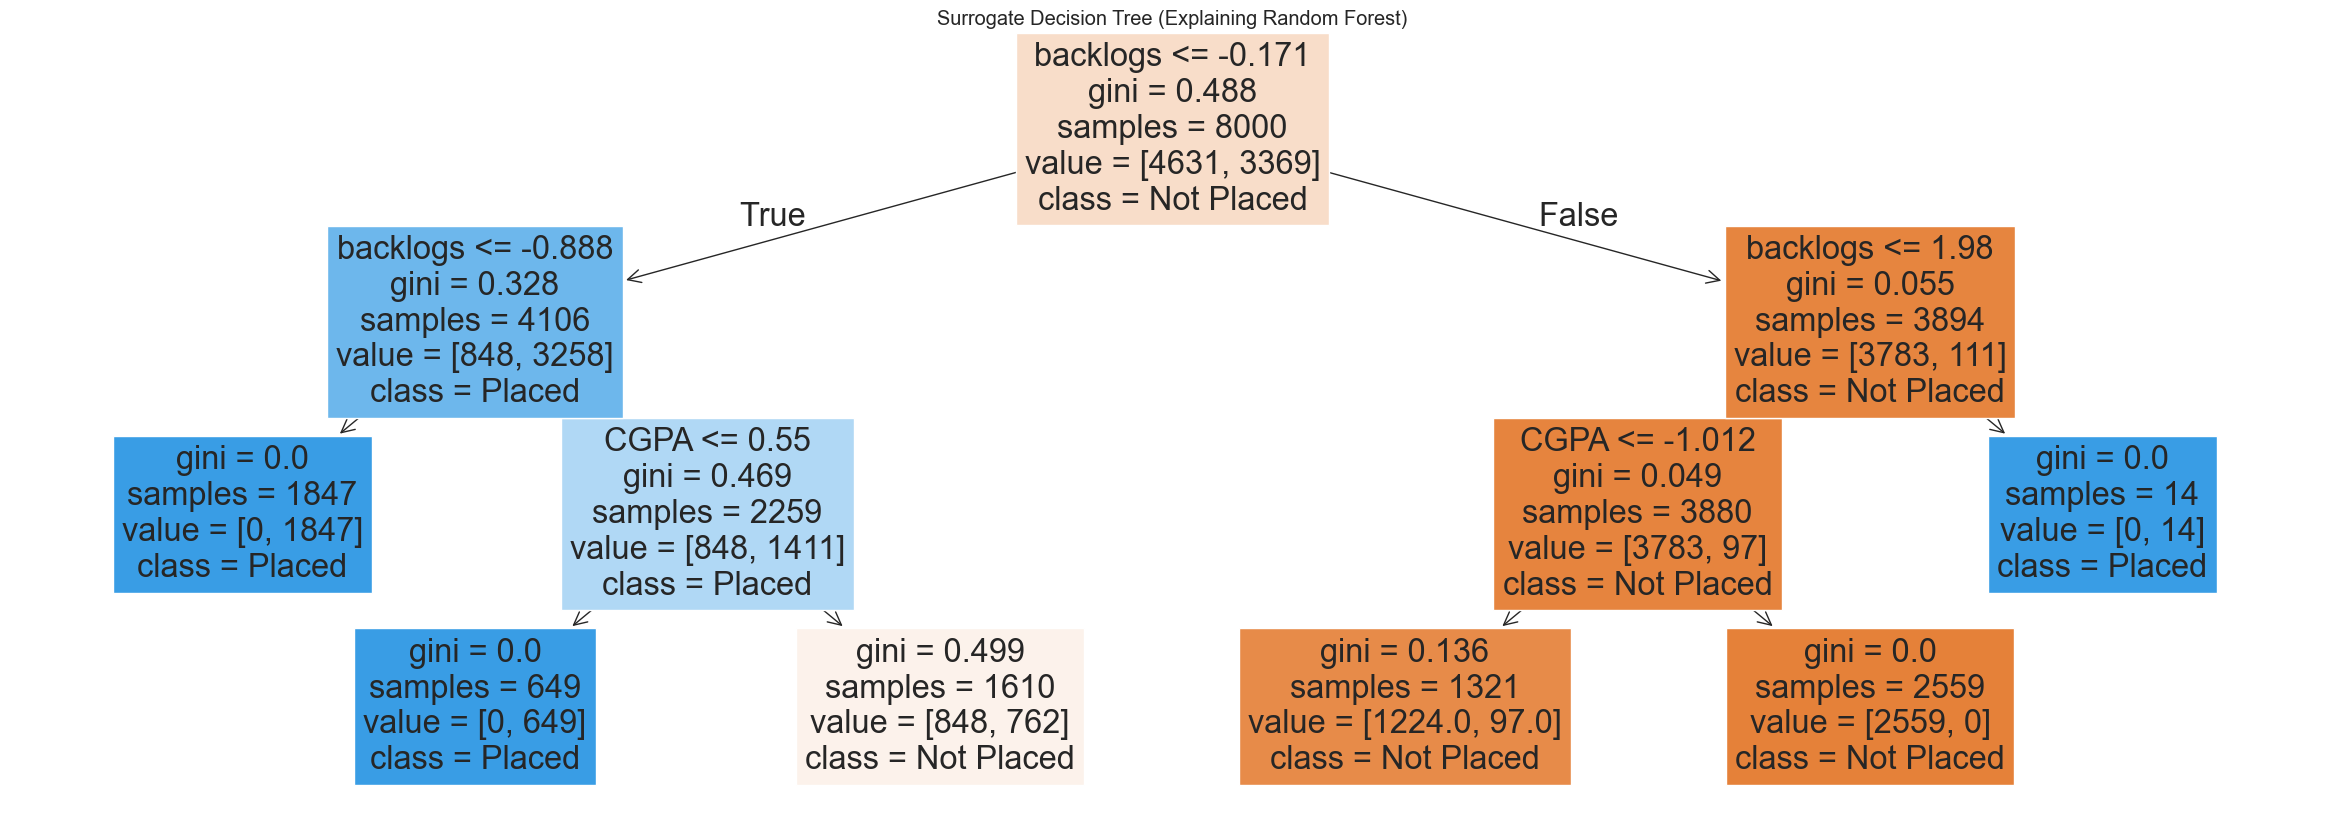

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(30,10))  # You can adjust the size
plot_tree(
    surrogate, 
    feature_names=feature_names, 
    class_names=["Not Placed", "Placed"], 
    filled=True,
    # rounded=True
)
plt.title("Surrogate Decision Tree (Explaining Random Forest)")
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Train a deeper surrogate tree
surrogate = DecisionTreeClassifier(max_depth=5, random_state=0)
surrogate.fit(X_train, best_model.predict(X_train))  # mimic RF predictions

# Plot the deeper tree
plt.figure(figsize=(24, 13))
tree.plot_tree(
    surrogate,
    feature_names=X.columns,
    class_names=["Not Placed", "Placed"],
    filled=True,
    rounded=True
)
plt.title("Deeper Surrogate Tree (max_depth=5)")
plt.show()


### R-SCORE reliability check

In [ ]:
# 7. R-SCORE RELIABILITY (SIMULATED EXAMPLE)
# We'll test explanation consistency by checking stability of SHAP top features

top_features_runs = []

for i in range(3):  # Run SHAP multiple times to check consistency
    explainer = shap.TreeExplainer(best_model)
    shap_vals = explainer.shap_values(X_test)
    top = np.argsort(np.abs(shap_vals[1]).mean(axis=0))[-5:]
    top_features_runs.append([X.columns[i] for i in top])


In [ ]:
# Show results of top features per run
for i, run in enumerate(top_features_runs):
    print(f"Top features run {i+1}: {run}")

Top features run 1: ['Unnamed: 0', 'StudentId']
Top features run 2: ['Unnamed: 0', 'StudentId']
Top features run 3: ['Unnamed: 0', 'StudentId']


In [ ]:
import joblib

# Save the best model (Random Forest)
joblib.dump(models["Random Forest"], "random_forest_model.pkl")

print("Model saved as random_forest_model.pkl")

Model saved as random_forest_model.pkl
